In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader ,TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
features , target = make_classification(n_classes=2,
                                            n_features=10,
                                            n_samples=100
                                        )

features_train,features_test,target_train,target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.1,
                                                                            random_state=1
                                                                        )

torch.manual_seed(0)
np.random.seed(0)

x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [3]:
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet,self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,1),
            torch.nn.Sigmoid()  
        )

    def forward(self,x):
        x = self.sequential(x)
        return x

In [4]:
network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

epochs = 8
train_losses = []
test_losses = []

for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        train_output = network(x_train)
        train_loss = criterion(output,target)
        train_losses.append(train_loss.item())

        test_output = network(x_test)
        test_loss = criterion(test_output,y_test)
        test_losses.append(test_loss.item())

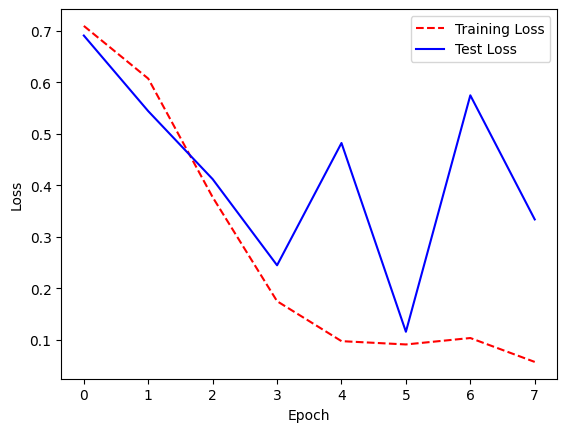

In [5]:
epochs = range(0,epochs)
plt.plot(epochs,train_losses,"r--")
plt.plot(epochs,test_losses,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();